# Подключаемся!

Для того, чтобы использовать данные гита вам нужно пробросить порт через ssh с использованием ключей.

Это можно сделать командой:

  ```
    ssh -i <путь до goto_rsa> -L 3306:web.ghtorrent.org:3306 ghtorrent@web.ghtorrent.org
    ```





##### (goto_rsa лежит в папке ssh_keys)


In [1]:
!ls ssh_keys

goto_rsa


# Вводим пароль!

Дальше вас попросят ввести ключ от goto_rsa, ключём является фраза 
```
gotothebest
```

Если всё пройдёт успешно, то вы увидете примерно такую картинку:


![](scrots/sdelal_pravilno.png)


А теперь можно забавляться с данными!

(во время работы - не закрывайте окно терминала)

# Устанавливаем MySQL драйвер!

Для работы с MySQL необходимо установить драйвер для работы с этой базой данных для питона: скачиваем модуль [MySQLdb](https://sourceforge.net/projects/mysql-python/files/mysql-python/1.2.3/), распаковываем и устанавливаем.

В package manager-ах пакет называется python-mysqldb, например


```sudo apt-get install python-mysqldb```

Если вы работаете в Anacond-e, то установка происходит командой:

### Python2:

```conda install mysql-python```

### Python3

```conda install mysql-connector-python```

## Доки

О том, каак работает Mysqldb вы можете почитать, например, [тут](http://zetcode.com/db/mysqlpython/)

Для 3-го питона используется немного другой модуль, о нём можно почитать [тут](http://dev.mysql.com/doc/connector-python/en/connector-python-example-connecting.html)

#### Далее привожу примеры работы на 3-тьем питоне. =)

## Работаем!

Внимание! Это нужно запомнить.
1. Хостинг машина хоть и мощная, но она не может быстро выполнять запросы к бд размеров в 10ТБ.
2. Есть люди, которые помимо вас пользуются этой же машиной, перед тем, как делать запросы убедитесь, что они простые и не подгружают вам все 10ТБ данных. Гораздо лучше, если вы будете выполнять простые запросы, например в for. 
3. Все запросы продолжительностью 100 секунд убиваются машиной без предупреждений.
4. В любое время машина может упасть! =(
5. Все ваши запросы логируются.

Описание датасета можно добыть в git_schema.pdf

[Более детальное описание.](http://ghtorrent.org/relational.html)

In [2]:
import mysql.connector

cnx = mysql.connector.connect(user='ght',
                              host='127.0.0.1',
                              database='ghtorrent')
cursor = cnx.cursor()

### Пример 1
#### Посмотрим на таблицы

In [3]:
cursor.execute("show tables;")
tables = cursor.fetchall()

In [4]:
tables = [i[0] for i in tables]

In [5]:
tables

['commit_comments',
 'commit_parents',
 'commits',
 'followers',
 'issue_comments',
 'issue_events',
 'issue_labels',
 'issues',
 'organization_members',
 'project_commits',
 'project_languages',
 'project_members',
 'projects',
 'pull_request_comments',
 'pull_request_commits',
 'pull_request_history',
 'pull_requests',
 'repo_labels',
 'repo_milestones',
 'users',
 'watchers']

Посмотрели.

### Пример 2
#### Посмотрим на свой проект =)

Свой номер в бд можно узнать зайдя:
```
    https://api.github.com/repos/<user>/<repo_name>
    ```

In [6]:
user_id = 2 # <ваш id из ссылки>
cursor.execute("select * from projects where id='%s';" % user_id)
cursor.fetchall()

[(2,
  'https://api.github.com/repos/kennethkalmer/ruote-kit',
  4,
  'ruote-kit',
  'RESTish wrapper for ruote workflow engine',
  'Ruby',
  datetime.datetime(2009, 6, 10, 20, 32, 21),
  None,
  0,
  datetime.datetime(2016, 2, 24, 7, 33, 16))]

### Пример 3
#### Построим граф связей пользователей

In [7]:
# Тут будут лежать ответы сервера
answers = []

# Рекурсия ограничена только системно.
def rec(user_id):
    global answers
    
    # Logs
    print("\r We now have %s users!" % len(answers), end="")
    
    # Возьмём друзей для пользователя
    cursor.execute("select * from followers where user_id='%s';" % user_id)
    answer = cursor.fetchall()
    
    # Сохраним их
    answers+=answer
    
    # Для каждого друга посмотрим его друзей
    for r in answer:
        rec(r[0])

In [8]:
try:
    rec(1)
except RecursionError:
    print("\n\nWe are ready to go!")

 We now have 174387 users, Morty!

We are ready to go!


In [9]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
G = nx.Graph()
for i in answers:
    G.add_edge(i[0],i[1])

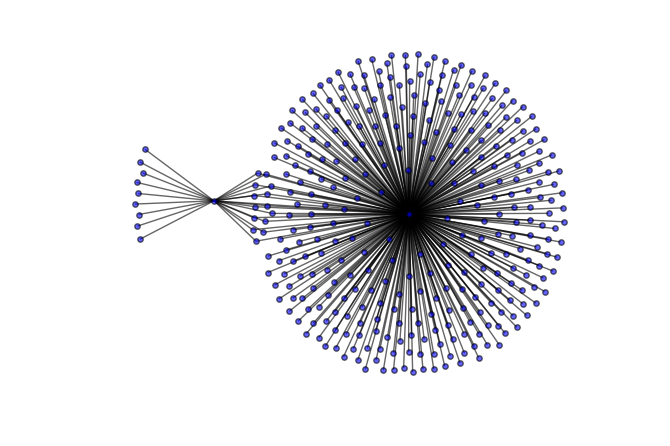

In [11]:
nx.draw(G,node_size=15,alpha = 0.6, node_color='b')